# <center>Phân tích ma trận trong Python</center>

## Mục lục
* [Thực hành](#c1)
    * [Trị riêng - Vector riêng](#c11)
    * [Chéo hóa](#c12)
    * [Chéo hóa trực giao](#c13)
* [Đồ án 2: Image Processing](#c2)
    * [Nội dung đồ án](#c21)
    * [Quy định nộp bài](#c22)
    * [Quy định chấm bài](#c23)

## Thực hành <a class="anchor" id="c1"></a>

Trong lab này, chúng ta sẽ tìm hiểu về phân tích ma trận sử dụng `NumPy`.

Cho ma trận:
$$A = \begin{bmatrix}
    3 & -2 & 0\\ 
    -2 & 3 & 0\\ 
    0 & 0 & 5
    \end{bmatrix}$$

In [1]:
import numpy as np

In [2]:
A = np.array([[3, -2, 0],
              [-2, 3, 0],
              [0, 0, 5]])

In [3]:
def is_close(A, B, eps=10e-3):
    return np.all(np.abs(A - B) < eps)

Các phân tích được giới thiệu trong lab này là:
1. Tìm trị riêng và vector riêng
2. Chéo hóa
3. Chéo hóa trực giao

### Trị riêng - Vector riêng <a class="anchor" id="c11"></a>

#### Sử dụng thuật toán [Power iteration](https://en.wikipedia.org/wiki/Power_iteration) và Hotelling's Deflation [[1](https://web.stanford.edu/~lmackey/papers/deflation-nips08.pdf), [2](https://www.robots.ox.ac.uk/~sjrob/Teaching/EngComp/ecl4.pdf)]

In [4]:
def eigen_power_iteration(A, n_iter=1000, eps=10e-5):
    # Khởi tạo vector ngẫu nhiên
    b_k = np.random.rand(A.shape[1])
    b_k_pre = np.zeros(A.shape[1])

    # Lặp tối đa n_iter lần để tìm vector riêng
    for _ in range(int(n_iter)):
        # Tính tích ma trận theo vector riêng
        numerator = np.dot(A, b_k)
        denominator = np.linalg.norm(numerator)
        
        b_k = numerator / denominator
        
        # Dừng khi sự thay đổi của vector trước và vector sau không đáng kể
        if np.all(np.abs(b_k - b_k_pre) < eps):
            break
        
        b_k_pre = b_k
        
    # Tìm trị riêng (Rayleigh quotient iteration)
    lamb = ((b_k @ A) @ b_k) / (b_k @ b_k)

    return lamb, b_k # lamb: trị riêng, b_k: vector riêng


def my_eigens(A, n_iter=1000, eps=10e-5):
    eigenvalues = []
    eigenvectors = []
    
    n_rows = A.shape[0]
    
    # Tìm tất cả các trị riêng, vector riêng có thể
    for _ in range(n_rows):
        lamb, b_k = eigen_power_iteration(A, n_iter, eps)
        
        eigenvalues.append(lamb)
        eigenvectors.append(b_k)
        
        # Hotelling's deflation
        b_k = b_k.reshape(-1, 1) # Chuyển đổi thành vector cột
        A = A - lamb * (b_k @ b_k.T)
        
    return np.array(eigenvalues), np.array(eigenvectors).T

In [5]:
my_eigenvalues, my_eigenvectors = my_eigens(A)

my_eigenvalues, my_eigenvectors

(array([5.        , 5.        , 1.00000001]),
 array([[-3.49302350e-01, -6.14786805e-01,  7.07195347e-01],
        [ 3.49313999e-01,  6.14820935e-01,  7.07018204e-01],
        [ 8.69463972e-01, -4.93996359e-01,  2.38004080e-05]]))

In [6]:
# Kiểm tra cặp trị riêng, vector riêng đầu tiên
my_lamb = my_eigenvalues[0]
my_X = my_eigenvectors[:, 0].reshape(-1, 1)

A @ my_X, my_lamb * my_X

(array([[-1.74653505],
        [ 1.7465467 ],
        [ 4.34731986]]),
 array([[-1.74651175],
        [ 1.74657   ],
        [ 4.34731986]]))

In [7]:
is_close(A @ my_X, my_lamb * my_X)

True

#### Thư viện `np.linalg`

In [8]:
np_eigenvalues, np_eigenvectors = np.linalg.eig(A)

np_eigenvalues, np_eigenvectors

(array([5., 1., 5.]),
 array([[ 0.70710678,  0.70710678,  0.        ],
        [-0.70710678,  0.70710678,  0.        ],
        [ 0.        ,  0.        ,  1.        ]]))

In [9]:
# Kiểm tra cặp trị riêng, vector riêng đầu tiên
np_lamb = np_eigenvalues[0]
np_X = np_eigenvectors[:, 0].reshape(-1, 1)

A @ np_X, np_lamb * np_X

(array([[ 3.53553391],
        [-3.53553391],
        [ 0.        ]]),
 array([[ 3.53553391],
        [-3.53553391],
        [ 0.        ]]))

In [10]:
is_close(A @ np_X, np_lamb * np_X)

True

### Chéo hóa <a class="anchor" id="c12"></a>

In [11]:
def my_diag(A):
    # Tìm trị riêng, vector riêng
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Sắp xếp giảm dần theo trị riêng
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]
    
    P_matrix = eigenvectors
    P_inv_matrix = np.linalg.inv(P_matrix)
    D_matrix = np.diag(eigenvalues)
    
    return P_matrix, D_matrix, P_inv_matrix

In [12]:
P, D, P_inv = my_diag(A)
(P, D, P_inv)

(array([[ 0.        ,  0.70710678,  0.70710678],
        [ 0.        , -0.70710678,  0.70710678],
        [ 1.        ,  0.        ,  0.        ]]),
 array([[5., 0., 0.],
        [0., 5., 0.],
        [0., 0., 1.]]),
 array([[ 0.        ,  0.        ,  1.        ],
        [ 0.70710678, -0.70710678,  0.        ],
        [ 0.70710678,  0.70710678,  0.        ]]))

In [13]:
is_close(D, P_inv @ A @ P)

True

### Chéo hóa trực giao <a class="anchor" id="c13"></a>

In [14]:
def my_orth_diag(A):
    # Tìm trị riêng, vector riêng
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Sắp xếp theo trị riêng giảm dần
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]
    
    # Trực giao
    P_matrix, _ = np.linalg.qr(eigenvectors)
    
    P_transpose = P_matrix.T
    D_matrix = np.diag(eigenvalues)
    
    return P_matrix, D_matrix, P_transpose

In [15]:
(P, D, P_T) = my_orth_diag(A)
(P, D, P_T)

(array([[ 0.        ,  0.70710678, -0.70710678],
        [-0.        , -0.70710678, -0.70710678],
        [-1.        ,  0.        ,  0.        ]]),
 array([[5., 0., 0.],
        [0., 5., 0.],
        [0., 0., 1.]]),
 array([[ 0.        , -0.        , -1.        ],
        [ 0.70710678, -0.70710678,  0.        ],
        [-0.70710678, -0.70710678,  0.        ]]))

In [16]:
is_close(D, P_T @ A @ P)

True

---

## Đồ án 2: Image Processing <a class="anchor" id="c2"></a>

### Nội dung đồ án <a class="anchor" id="c21"></a>

#### Giới thiệu

Một bức ảnh có thể lưu trữ dưới ma trận của các điểm ảnh. Có nhiều loại ảnh được sử dụng trong thực tế, ví dụ: ảnh xám, ảnh màu,... 

Đối với ảnh xám, một điểm ảnh sẽ là được biểu diễn bằng giá trị không âm. 

Ví dụ ta có thể dùng ma trận này:
$$\begin{bmatrix}
255 & 0 & 0  & 0  & 255 \\ 
255 & 0 & 255 & 0 & 255\\ 
255 & 0 & 255 & 0 & 255\\ 
255 & 0 & 255 & 0 & 255\\ 
255 & 0 & 0  & 0  & 255
\end{bmatrix}$$

có thể biểu diễn cho ảnh xám có nội dung như sau:

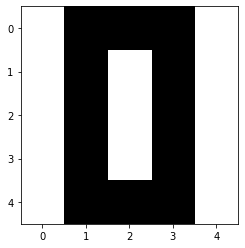

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.array([[255, 0, 0,   0, 255],
                     [255, 0, 255, 0, 255],
                     [255, 0, 255, 0, 255],
                     [255, 0, 255, 0, 255],
                     [255, 0, 0,   0, 255]]), cmap='gray', vmin=0, vmax=255);

Ảnh màu được sử dụng phổ biến là ảnh RGB, trong đó, mỗi điểm ảnh sẽ lưu trữ 3 thông tin kênh màu (mỗi kênh màu 1 byte) là: R (red - đỏ), G (green - xanh lá), B (blue - xanh dương). Ta có thể sử dụng ma trận:
```
                    [[[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]]]
```
để biểu diễn cho ảnh màu có nội dung sau:

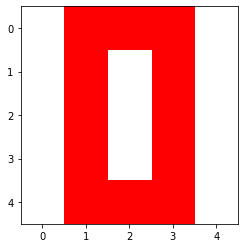

In [26]:
plt.imshow(np.array([[[255, 255, 255], [255, 0, 0], [255, 0,   0],   [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 0,   0],   [255, 0, 0], [255, 255, 255]]]));
a =np.array([[[255, 255, 255], [255, 0, 0], [255, 0,   0],   [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 0,   0],   [255, 0, 0], [255, 255, 255]]])


Tóm lại, ảnh được lưu trữ dưới dạng **ma trận các điểm ảnh**. Mỗi điểm ảnh có thể là *một giá trị* (ảnh xám) hoặc **một vector** (ảnh màu).

#### Yêu cầu

Trong đồ án này, bạn được yêu cầu thực hiện các chức năng xử lý ảnh cơ bản sau:
    
1. Thay đổi độ sáng cho ảnh (1 điểm)

![img](https://i.imgur.com/XIaBAIv.jpg)

2. Thay đổi độ tương phản (1 điểm)

![img](https://i.imgur.com/4uxIHJD.jpg)

3. Chuyển đổi ảnh RGB thành ảnh xám (2 điểm)

![img](https://i.imgur.com/qJw14wS.jpg)

Tham khảo tại [đây](https://www.tutorialspoint.com/dip/grayscale_to_rgb_conversion.htm)

4. Lật ảnh (ngang - dọc) (2 điểm)

![img](https://i.imgur.com/VKjvVdc.jpg)

5. Chồng 2 ảnh cùng kích thước (2 điểm): chỉ làm trên ảnh xám

![img](https://i.imgur.com/no2NH1k.jpg)

6. Làm mờ ảnh (2 điểm)

![img](https://i.imgur.com/daY9Mnd.jpg)

Tham khảo tại [đây](https://en.wikipedia.org/wiki/Kernel_(image_processing)), phần Box blur hoặc Gaussian blur 3 $\times$ 3

Trong đồ án này, bạn <font style="color:red">**CHỈ ĐƯỢC PHÉP**</font> sử dụng các thư viện sau: `PIL`, `numpy`, `matplotlib`

Cụ thể, nếu đề yêu cầu bạn viết ra chức năng đó, thì bạn phải thực sự viết ra chức năng đó chứ không phải gọi hàm có sẵn.

- Các bạn sử dụng `PIL` (`open(), save()` từ `Image`) để đọc và ghi; `Matplotlib` (`imshow()` từ `pyplot`) để hiển thị ảnh.

- Được phép sử dụng thư viện `NumPy` tùy ý.

### Quy định bài nộp <a class="anchor" id="c22"></a>

* Thực hiện toàn bộ bài làm trên 1 tập tin Jupyter Notebook (.ipynb) hoặc Python (.py)


* Bạn nộp tập tin `MSSV.zip` được nén từ thư mục MSSV chứa các tập tin sau:
    1. Báo cáo toàn bộ bài làm: `MSSV.pdf`
    2. Mã nguồn: `MSSV.ipynb` hoặc `MSSV.py`


* Trong đó, nội dung tập tin báo cáo gồm có:
    - Thông tin cá nhân: họ và tên, MSSV
    - Liệt kê các chức năng đã hoàn thành
    - Ý tưởng thực hiện, mô tả các hàm chức năng
    - Hình ảnh kết quả với từng chức năng
    
    
* Ví dụ minh họa cây thư mục bài nộp sau khi giải nén tập tin `MSSV.zip` như sau:
```
MSSV
├── MSSV.pdf
└── MSSV.ipynb
```

### Quy định chấm bài <a class="anchor" id="c23"></a>

Đây là đồ án chiếm 10%.

Những trường hợp sau đây sẽ bị 0 điểm toàn bộ đồ án:
* Nộp sai quy định
* Không có báo cáo
* Thực thi mã nguồn báo lỗi

<font style="color:red">**LƯU Ý: SAO CHÉP BÀI LÀM CỦA NHAU SẼ BỊ 0 ĐIỂM TOÀN BỘ PHẦN THỰC HÀNH**</font>